# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [39]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/lena.png` and show it:

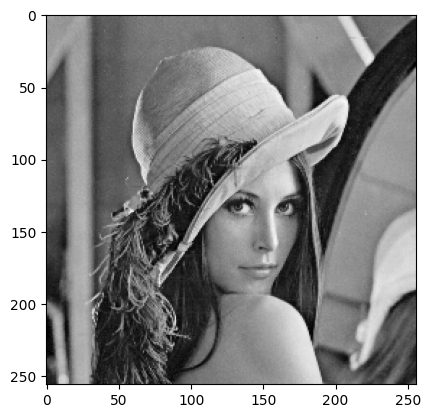

In [40]:
img=plt.imread("data/lena.png")
plt.imshow(img,"gray")

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [41]:
def meanfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    # define N to be the total number of pixels in the square, to be used later to divide by
    N=size*size
    # iterate through all pixels p of the image
    for p in numpy.ndindex(img.shape):
        # handle the edges, i.e. when too close to the edge for the matrix to "grab", set the value to 0 by default
        if (p[0]<n or p[0]>(img.shape[0]-1-n) or p[1]<n or p[1]>(img.shape[1]-1-n)):
            result[p]=0 
        else: 
            # compute the mean value by applying the filter matrix to the square of the image centered around p       
            neighborhood_sum = 0
            for q in numpy.ndindex(size, size):
               # use an offset to shift the q-matrix to center around (0,0)
               neighborhood_sum+=img[p[0]+q[0]-n,p[1]+q[1]-n]
            # divide by N   
            result[p]=neighborhood_sum/N
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

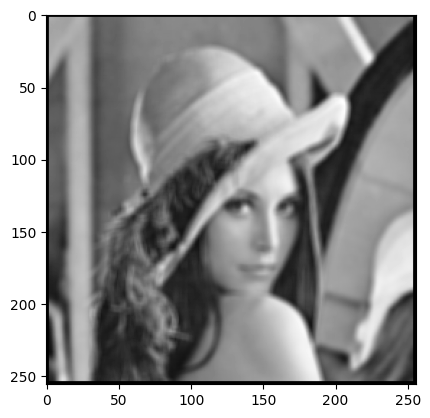

In [42]:
img_mean=meanfilter(img,5)
plt.imshow(img_mean,"gray")

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/lena_meanfilter5.png`:

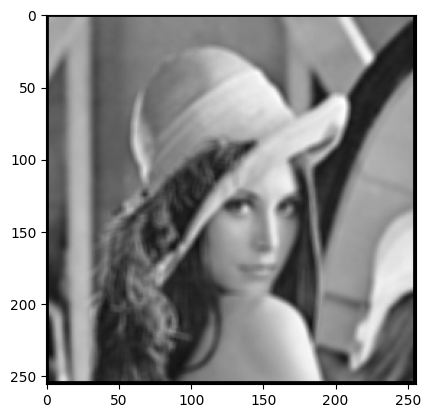

In [43]:
correct=plt.imread("data/lena_meanfilter5.png")
plt.imshow(correct,"gray")
assert numpy.allclose(img_mean, correct, atol=1/255)


---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [44]:
def medianfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    # define N as the "middle" index of the sequence to be used later
    N=(size*size-1)//2
    # iterate through all pixels p of the image
    for p in numpy.ndindex(img.shape):
        # handle the edges, i.e. when too close to the edge for the matrix to "grab", set the value to 0 by default
        if (p[0]<n or p[0]>(img.shape[0]-1-n) or p[1]<n or p[1]>(img.shape[1]-1-n)):
            result[p]=0 
        else: 
            # compute the median value by selecting the pixel values from the square around p, sort, and then select the middle value (we always have an odd number of elements in the sequence, so the median is always clearly the middle one)   
            neighborhood_list = list()
            for q in numpy.ndindex(size, size):
               # use an offset to shift the q-matrix to center around (0,0), and append the respective pixel value to the list
               neighborhood_list.append(img[p[0]+q[0]-n,p[1]+q[1]-n])
            # sort the list
            neighborhood_list.sort()   
            # pick the middle value from the list, located at index N
            result[p]=neighborhood_list[N]
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

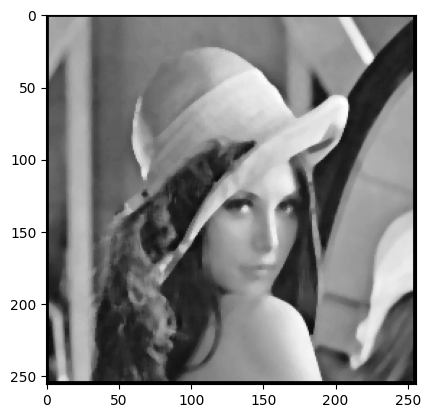

In [45]:
img_median=medianfilter(img,5)
plt.imshow(img_median,"gray")

Then, compare your result for filter size `5` with the correct result image `data/lena_medianfilter5.png`:

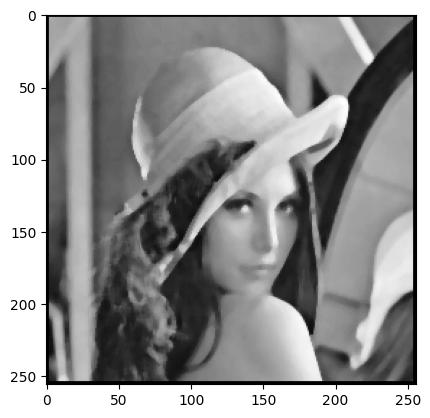

In [46]:
correct_median=plt.imread("data/lena_medianfilter5.png")
plt.imshow(correct_median,"gray")
assert numpy.allclose(img_median, correct_median, atol=1/255)

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [47]:
import scipy.ndimage


**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

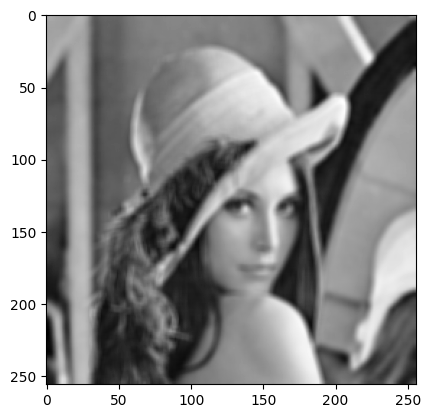

In [48]:
img_scipy_mean=scipy.ndimage.uniform_filter(img, 5)
plt.imshow(img_scipy_mean,"gray")

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

size x: 256
size y: 256


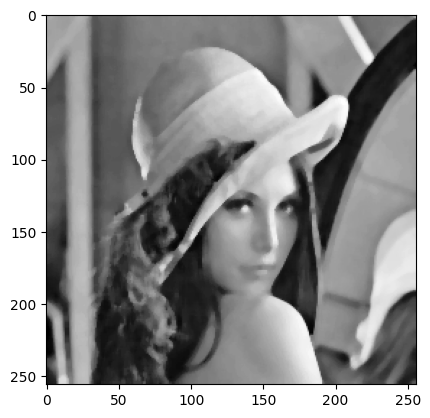

In [49]:
img_scipy_median=scipy.ndimage.median_filter(img, 5)
plt.imshow(img_scipy_median,"gray")
print("size x: "+str(img_scipy_median.shape[1]))
print("size y: "+str(img_scipy_median.shape[0]))

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

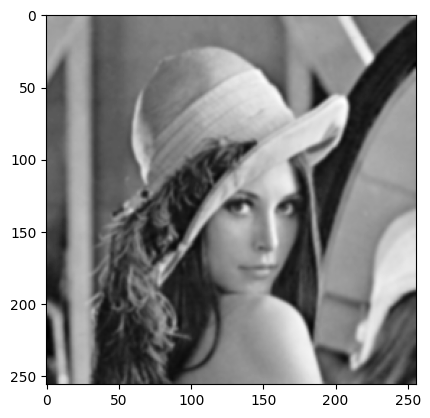

In [50]:
img_scipy_gaussian=scipy.ndimage.gaussian_filter(img, 1)
plt.imshow(img_scipy_gaussian,"gray")

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

Observations:
- overall impression of the images is that they are of the same quality
- much faster execution of the calculations
- border is thin, as compared to the ones created with own algorithm
- the result of the Gaussian filtering depends a lot on the value chosen for sigma

Possible explanations:
- the algorithms may be implemented differently in the scipy package, in that the code is not interpreted at runtime, but pre-compiled, which makes them execute much faster
- the image in the scipy package may have been extended beyond the original border before applying the actual algorithm, to allow computing the new pixel values all the way to the border

We'll now check whether the images are the "same" (i.e. same quality), except for the border:

new dimensions: 252 x 252


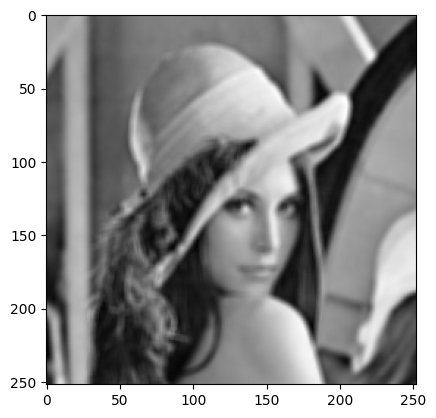

In [51]:
# define a reduced image by removing the border from the resulting images in all cases (using the size=5 case, i.e. a border width of n=2):
# mean:
img_mean_reduced=img_mean[2:254,2:254]
plt.imshow(img_mean_reduced,"gray")
print("new dimensions: "+str(img_mean_reduced.shape[1]) + " x " + str(img_mean_reduced.shape[0]))
img_scipy_mean_reduced=img_scipy_mean[2:254,2:254]
assert numpy.allclose(img_mean_reduced, img_scipy_mean_reduced, atol=1/255)
# median:
img_median_reduced=img_median[2:254,2:254]
img_scipy_median_reduced=img_scipy_median[2:254,2:254]
assert numpy.allclose(img_median_reduced, img_scipy_median_reduced, atol=1/255)

Indeed, the images with the border removed are the same.

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [52]:
# Let's do this for the mean filter:
def fastfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    # define N to be the total number of pixels in the square, to be used later to divide by
    N=size*size
    # iterate through all pixels p of the image
    for p in numpy.ndindex(img.shape):
        # handle the edges, i.e. when too close to the edge for the matrix to "grab", set the value to 0 by default
        if (p[0]<n or p[0]>(img.shape[0]-1-n) or p[1]<n or p[1]>(img.shape[1]-1-n)):
            result[p]=0 
        else: 
            # compute the mean value by selecting a quadratic slice (size x size) around p and using the mean()-function on it   
            sub_image=img[p[0]-n:p[0]+n+1,p[1]-n:p[1]+n+1]
            result[p]=sub_image.mean()
    return result

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

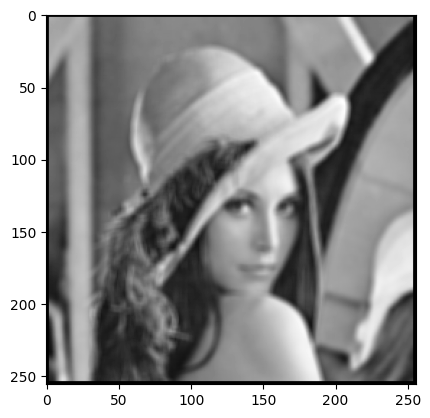

In [53]:
img_mean_fast=fastfilter(img,5)
plt.imshow(img_mean_fast,"gray")

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

In [54]:
assert numpy.allclose(img_mean, img_mean_fast, atol=1/255)

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

In [55]:
%timeit fastfilter(img, 9)

466 ms ± 59.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [56]:
%timeit meanfilter(img, 9)

3.32 s ± 94.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation:

The fastfilter function is about 7 times faster than the original one (0.448s vs. 3.31s).
By reducing to a single loop, we save the time that was needed to run the second loop. In addition, the mean()-function is preimplemented in the numpy package, which likely means that it is executed based on precompiled code, and not interpreted at runtime.
